In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from weight_extractor import weight_extractor

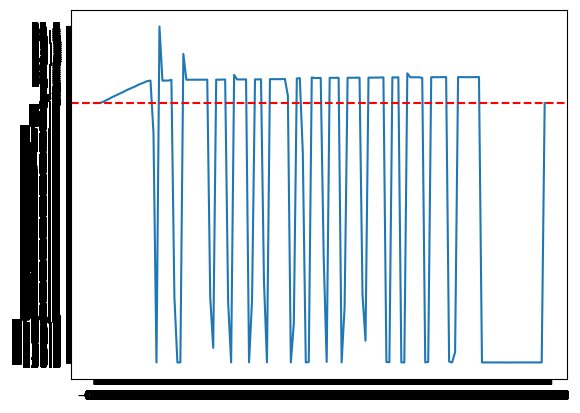

In [2]:
df = pd.read_csv('files/二回目.csv', header = None)
filtered_df = df.iloc[1:, :5]
filtered_df = np.array([float(filtered_df.iloc[i, 4]) for i in range(filtered_df.shape[0])]) 
we3 = weight_extractor(filtered_df)
we3.drawGraph(we3.indexes, we3.weight_array)

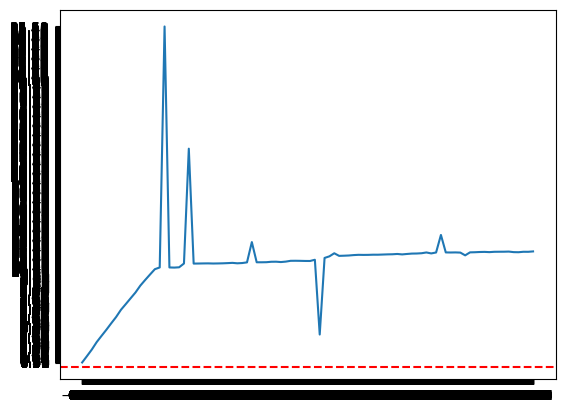

In [3]:
we3.deleteShake()
indexes = np.array([i for i in range(we3.weight_array_over_zero.size)])
we3.drawGraph(indexes, we3.weight_array_over_zero) 

In [5]:
deltas = np.diff(we3.weight_array_over_zero)
print(np.min(deltas))
print(np.max(deltas))

-25.191000000000003
25.191000000000003


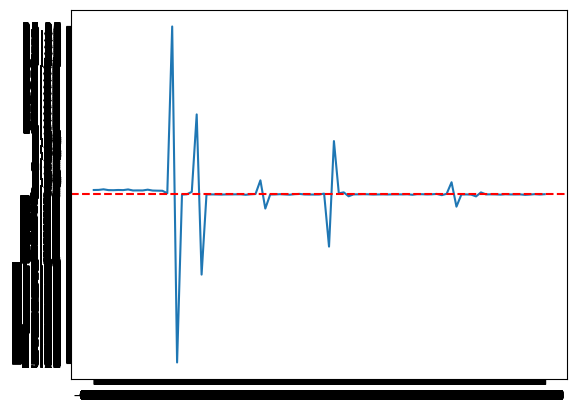

In [6]:
indexes = np.array([i for i in range(deltas.size)])
we3.drawGraph(indexes, deltas) 

In [7]:
print(deltas)

[ 6.7000e-01  6.8600e-01  7.7500e-01  6.5200e-01  6.4000e-01  6.7400e-01
  6.5300e-01  7.5500e-01  5.9900e-01  6.0900e-01  6.0300e-01  7.2000e-01
  5.9000e-01  5.7000e-01  5.5700e-01  1.8200e-01  2.5191e+01 -2.5191e+01
 -1.5000e-02  3.0000e-02  3.9500e-01  1.2006e+01 -1.2013e+01  7.0000e-03
  1.0000e-02  5.0000e-03 -1.4000e-02  8.0000e-03  1.2000e-02  2.1000e-02
  2.6000e-02 -4.5000e-02  2.7000e-02  7.0000e-02  2.1210e+00 -2.1100e+00
 -1.0000e-03  8.0000e-03  4.5000e-02  7.0000e-03 -3.6000e-02  4.6000e-02
  8.3000e-02  5.0000e-03 -8.0000e-03 -1.2000e-02 -3.0000e-03  1.2800e-01
 -7.8160e+00  8.0070e+00  1.6700e-01  3.2100e-01 -2.7200e-01  1.7000e-02
  2.2000e-02  4.3000e-02  2.7000e-02 -9.0000e-03  5.0000e-03  1.7000e-02
 -1.0000e-03  1.8000e-02  1.8000e-02  1.0000e-02  3.2000e-02 -4.6000e-02
  4.6000e-02  3.9000e-02  9.0000e-03  2.8000e-02  8.1000e-02 -1.0000e-01
  9.7000e-02  1.8330e+00 -1.8250e+00 -9.0000e-03  9.0000e-03 -1.8000e-02
 -2.8900e-01  3.1300e-01  1.3000e-02  2.4000e-02  1

In [9]:
print(np.sort(deltas))

[-2.5191e+01 -1.2013e+01 -7.8160e+00 -2.1100e+00 -1.8250e+00 -2.8900e-01
 -2.7200e-01 -1.0000e-01 -5.7000e-02 -4.6000e-02 -4.5000e-02 -3.6000e-02
 -2.5000e-02 -1.8000e-02 -1.5000e-02 -1.4000e-02 -1.2000e-02 -1.0000e-02
 -9.0000e-03 -9.0000e-03 -8.0000e-03 -3.0000e-03 -3.0000e-03 -1.0000e-03
 -1.0000e-03  3.0000e-03  5.0000e-03  5.0000e-03  5.0000e-03  6.0000e-03
  7.0000e-03  7.0000e-03  8.0000e-03  8.0000e-03  9.0000e-03  9.0000e-03
  1.0000e-02  1.0000e-02  1.2000e-02  1.2000e-02  1.3000e-02  1.4000e-02
  1.7000e-02  1.7000e-02  1.8000e-02  1.8000e-02  2.1000e-02  2.2000e-02
  2.4000e-02  2.6000e-02  2.7000e-02  2.7000e-02  2.8000e-02  3.0000e-02
  3.2000e-02  3.4000e-02  3.9000e-02  4.0000e-02  4.3000e-02  4.5000e-02
  4.6000e-02  4.6000e-02  4.7000e-02  7.0000e-02  8.1000e-02  8.3000e-02
  9.7000e-02  1.2800e-01  1.6700e-01  1.8200e-01  3.1300e-01  3.2100e-01
  3.9500e-01  5.5700e-01  5.7000e-01  5.9000e-01  5.9900e-01  6.0300e-01
  6.0900e-01  6.4000e-01  6.5200e-01  6.5300e-01  6

### 标准差

In [10]:
std_dev = np.std(deltas)
oscillations = np.abs(deltas) > 2 * std_dev
indices_to_remove = np.where(oscillations)[0] + 1
cleaned_data = np.delete(we3.weight_array_over_zero, indices_to_remove)

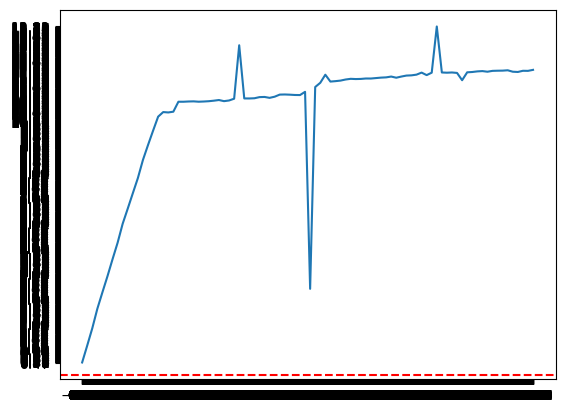

In [11]:
indexes = np.array([i for i in range(cleaned_data.size)])
we3.drawGraph(indexes, cleaned_data) 

## Z-Score 

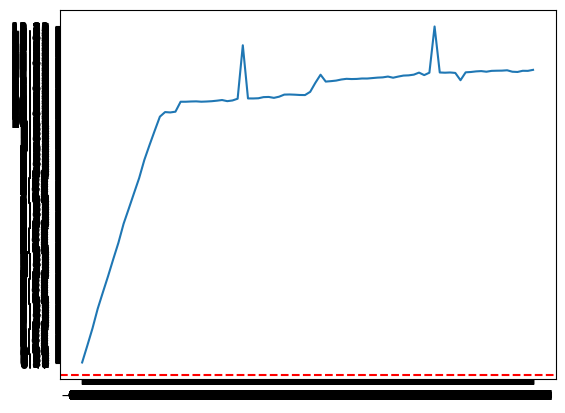

In [17]:
from scipy.stats import zscore

z_scores = zscore(deltas)
threshold = 1
oscillations = np.abs(z_scores) > threshold
indices_to_remove = np.where(oscillations)[0] + 1
cleaned_data = np.delete(we3.weight_array_over_zero, indices_to_remove)
indexes = np.array([i for i in range(cleaned_data.size)])
we3.drawGraph(indexes, cleaned_data) 

## 滚动平均线

ValueError: arange: cannot compute length

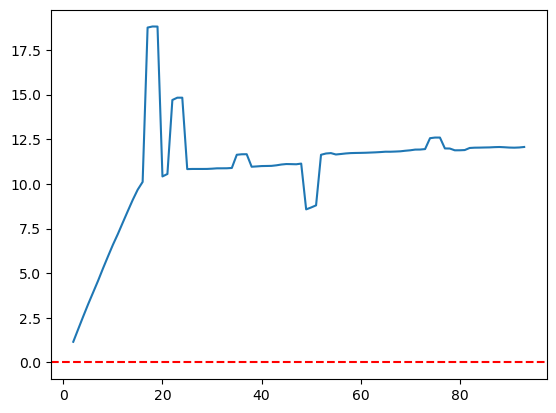

In [18]:
data_series = pd.Series(we3.weight_array_over_zero)
window_size = 3  # 窗口大小可以根据数据调整
smoothed_data = data_series.rolling(window=window_size).mean()
indexes = np.array([i for i in range(smoothed_data.size)])
we3.drawGraph(indexes,smoothed_data) 